In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point

# US states
## How to get a list of points inside a polygon in Python
### https://www.matecdev.com/posts/point-in-polygon.html
### https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html
### https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_20m.zip

In [5]:
US_states=gpd.GeoDataFrame.from_file('/media/Data1/Climada/isimip3/cb_2018_us_state_20m.shp')

In [6]:
US_states

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827..."
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757..."
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ..."
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987..."
5,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134,"POLYGON ((-104.05314 41.11446, -104.05245 41.2..."
6,53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850,"MULTIPOLYGON (((-123.23715 48.68347, -123.0704..."
7,72,01779808,0400000US72,72,PR,Puerto Rico,00,8868896030,4922382562,"MULTIPOLYGON (((-65.34207 18.34529, -65.25593 ..."
8,01,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154,"POLYGON ((-88.46866 31.89386, -88.46866 31.933..."
9,05,00068085,0400000US05,05,AR,Arkansas,00,134768872727,2962859592,"POLYGON ((-94.61792 36.49941, -94.36120 36.499..."


# Create geodataframe from numpy arrays

In [7]:
X=np.load('rainfed_maize_production_Xgrid.npy') #Longitudes of 2-dimension grid points
Y=np.load('rainfed_maize_production_Ygrid.npy') #Latitudes of 2-dimension grid points
print(X.shape)
print(Y.shape)

(60, 60)
(60, 60)


In [8]:
xx=X.flatten()
yy=Y.flatten()
print(xx.shape)
print(yy.shape)

(3600,)
(3600,)


In [9]:
df = pd.DataFrame({'lon':xx, 'lat':yy})
df['coords'] = list(zip(df['lon'],df['lat']))
df['coords'] = df['coords'].apply(Point)
points=gpd.GeoDataFrame(df, geometry='coords', crs=US_states.crs)

In [10]:
# Perform spatial join to match points and polygons
pointInPolys = gpd.tools.sjoin(points, US_states, predicate="within", how='left')

In [11]:
pointInPolys.tail()

,lon,lat,coords,index_right,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER
3595,-72.25,35.25,POINT (-72.25000 35.25000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3596,-71.75,35.25,POINT (-71.75000 35.25000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3597,-71.25,35.25,POINT (-71.25000 35.25000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3598,-70.75,35.25,POINT (-70.75000 35.25000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3599,-70.25,35.25,POINT (-70.25000 35.25000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
pnt_Iowa = points[pointInPolys.NAME=='Iowa']
pnt_MN = points[pointInPolys.STUSPS=='MN']
pnt_IA = points[pointInPolys.STUSPS=='IA']
pnt_WI = points[pointInPolys.STUSPS=='WI']
pnt_IL = points[pointInPolys.STUSPS=='IL']
pnt_MI = points[pointInPolys.STUSPS=='MI']
pnt_IN = points[pointInPolys.STUSPS=='IN']
pnt_OH = points[pointInPolys.STUSPS=='OH']
pnt_NY = points[pointInPolys.STUSPS=='NY']
pnt_PA = points[pointInPolys.STUSPS=='PA']
pnt_MD = points[pointInPolys.STUSPS=='MD']


In [13]:
pnt_IA.to_csv('state_province_gridcell_csvfiles\Gridcell_IA.csv')
pnt_MN.to_csv('state_province_gridcell_csvfiles\Gridcell_MN.csv')
pnt_WI.to_csv('state_province_gridcell_csvfiles\Gridcell_WI.csv')
pnt_IL.to_csv('state_province_gridcell_csvfiles\Gridcell_IL.csv')
pnt_MI.to_csv('state_province_gridcell_csvfiles\Gridcell_MI.csv')
pnt_IN.to_csv('state_province_gridcell_csvfiles\Gridcell_IN.csv')
pnt_OH.to_csv('state_province_gridcell_csvfiles\Gridcell_OH.csv')
pnt_NY.to_csv('state_province_gridcell_csvfiles\Gridcell_NY.csv')
pnt_PA.to_csv('state_province_gridcell_csvfiles\Gridcell_PA.csv')
pnt_MD.to_csv('state_province_gridcell_csvfiles\Gridcell_MD.csv')

In [14]:
pnt_Iowa

,lon,lat,coords
2587,-96.25,43.25,POINT (-96.25000 43.25000)
2588,-95.75,43.25,POINT (-95.75000 43.25000)
2589,-95.25,43.25,POINT (-95.25000 43.25000)
2590,-94.75,43.25,POINT (-94.75000 43.25000)
2591,-94.25,43.25,POINT (-94.25000 43.25000)
...,...,...,...
2893,-93.25,40.75,POINT (-93.25000 40.75000)
2894,-92.75,40.75,POINT (-92.75000 40.75000)
2895,-92.25,40.75,POINT (-92.25000 40.75000)
2896,-91.75,40.75,POINT (-91.75000 40.75000)


In [15]:
pnt_Iowa.to_csv('GridCellsWithin_Iowa.csv')

<Figure size 1440x1080 with 0 Axes>

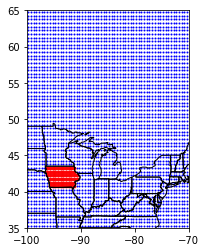

In [16]:
# Plot map with points in Iowa in red
figure=plt.figure(figsize=(20,15))
base = US_states.boundary.plot(linewidth=1, edgecolor="black")
points.plot(ax=base, linewidth=1, color="blue", markersize=1)
pnt_Iowa.plot(ax=base, linewidth=1, color="red", markersize=8)
plt.xlim([-100,-70])
plt.ylim([35,65])
plt.show()

# Canada

### https://www12.statcan.gc.ca/census-recensement/2011/geo/bound-limit/files-fichiers/gpr_000b11a_e.zip

In [17]:
CA_provinces=gpd.GeoDataFrame.from_file('/media/Data1/Climada/isimip3/gpr_000b11a_e.shp')


In [18]:
ca_points=gpd.GeoDataFrame(df, geometry='coords', crs=CA_provinces.crs)
Ca_pointInPolys = gpd.tools.sjoin(ca_points, CA_provinces, predicate="within", how='left')

In [19]:
CA_provinces

,PRUID,PRNAME,PRENAME,PRFNAME,PREABBR,PRFABBR,geometry
0,59,British Columbia / Colombie-Britannique,British Columbia,Colombie-Britannique,B.C.,C.-B.,"MULTIPOLYGON (((-123.53977 48.31735, -123.5397..."
1,24,Quebec / Québec,Quebec,Québec,Que.,Qc,"MULTIPOLYGON (((-74.63814 44.99984, -74.63859 ..."
2,62,Nunavut,Nunavut,Nunavut,Nvt.,Nt,"MULTIPOLYGON (((-79.99352 51.27725, -79.99475 ..."
3,11,Prince Edward Island / Île-du-Prince-Édouard,Prince Edward Island,Île-du-Prince-Édouard,P.E.I.,Î.-P.-É.,"MULTIPOLYGON (((-62.49302 46.02515, -62.49337 ..."
4,47,Saskatchewan,Saskatchewan,Saskatchewan,Sask.,Sask.,"POLYGON ((-102.00000 60.00000, -102.00000 59.9..."
5,60,Yukon,Yukon,Yukon,Y.T.,Yn,"MULTIPOLYGON (((-136.47224 68.89388, -136.4705..."
6,46,Manitoba,Manitoba,Manitoba,Man.,Man.,"MULTIPOLYGON (((-95.15588 49.59155, -95.15657 ..."
7,35,Ontario,Ontario,Ontario,Ont.,Ont.,"MULTIPOLYGON (((-82.68871 41.68453, -82.68631 ..."
8,13,New Brunswick / Nouveau-Brunswick,New Brunswick,Nouveau-Brunswick,N.B.,N.-B.,"MULTIPOLYGON (((-66.76541 44.58377, -66.76462 ..."
9,61,Northwest Territories / Territoires du Nord-Ouest,Northwest Territories,Territoires du Nord-Ouest,N.W.T.,T.N.-O.,"MULTIPOLYGON (((-133.43943 68.78677, -133.4430..."


In [20]:
pnt_Ontario = ca_points[Ca_pointInPolys.PRENAME=='Ontario']

In [21]:
pnt_Ontario.to_csv('state_province_gridcell_csvfiles\Gridcell_ON.csv')

In [22]:
pnt_Quebec = ca_points[Ca_pointInPolys.PRENAME=='Quebec']

In [23]:
pnt_Quebec.to_csv('state_province_gridcell_csvfiles\Gridcell_QC.csv')

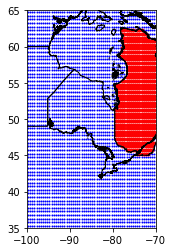

In [24]:
# Plot map with points in Quebec in red
#figure=plt.figure(figsize=(20,15))
base =CA_provinces.boundary.plot(linewidth=1, edgecolor="black")
points.plot(ax=base, linewidth=1, color="blue", markersize=1)
pnt_Quebec.plot(ax=base, linewidth=1, color="red", markersize=8)
plt.xlim([-100,-70])
plt.ylim([35,65])
plt.show()

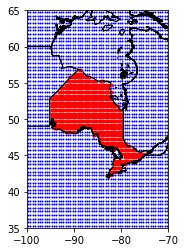

In [25]:
# Plot map with points in Ontario in red
#figure=plt.figure(figsize=(20,15))
base =CA_provinces.boundary.plot(linewidth=1, edgecolor="black")
points.plot(ax=base, linewidth=1, color="blue", markersize=1)
pnt_Ontario.plot(ax=base, linewidth=1, color="red", markersize=8)
plt.xlim([-100,-70])
plt.ylim([35,65])
plt.show()